In [1]:
import os
import os.path as osp
import time

import numpy as np
import pygmo as pg

from lpf.data import load_model_dicts
from lpf.data import load_targets
from lpf.solvers import SolverFactory
from lpf.search import EvoSearch
from lpf.objectives import ObjectiveFactory
from lpf.models import ModelFactory
from lpf.converters import ConverterFactory

In [2]:
LPF_REPO_HOME = osp.abspath("..")
LPF_REPO_HOME

'/home/dwlee/repos/lpf'

In [3]:
# Create a model.
dx = 0.1
width = 128
height = 128
n_init_pts = 25

model = ModelFactory.create(
    name="Liaw",
    n_init_pts=n_init_pts,
    width=width,
    height=height,                 
    dx=dx
)

In [4]:
# Create a solver.
dt = 0.01
n_iters = 500000
solver = SolverFactory.create(name="Euler", dt=dt, n_iters=n_iters)

In [5]:
# Create a converter.
converter = ConverterFactory.create("LiawInitializer")

In [6]:
# Create objectives.
obj_config = [
    ['MeanMeanSquareError', '1e-1', 'cpu'],
    ['MeanColorProportion', '1e0', 'cpu'],
    ['MeanVgg16PerceptualLoss', '1e-4', 'cuda:0'],
    ['MeanLearnedPerceptualImagePatchSimilarity:vgg', '1.5e1', 'cuda:0'],
    ['MeanLearnedPerceptualImagePatchSimilarity:alex', '4e0', 'cuda:0']
]

objectives = ObjectiveFactory.create(obj_config)

[OBJECTIVE DEVICE] MeanMeanSquareError: cpu
[OBJECTIVE DEVICE] MeanColorProportion: cpu
[OBJECTIVE DEVICE] MeanVgg16PerceptualLoss: cuda:0
[OBJECTIVE DEVICE] MeanLearnedPerceptualImagePatchSimilarity:vgg: cuda:0


/home/dwlee/softwares/anaconda3/envs/lpf/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dwlee/softwares/anaconda3/envs/lpf/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[OBJECTIVE DEVICE] MeanLearnedPerceptualImagePatchSimilarity:alex: cuda:0


/home/dwlee/softwares/anaconda3/envs/lpf/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[TARGET] ladybird_axyridis_02.png has been added...
[TARGET] ladybird_axyridis_03.png has been added...
[TARGET] ladybird_axyridis_01.png has been added...


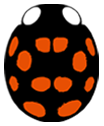

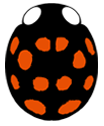

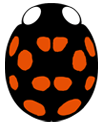

In [7]:
# Load the target laybirds.
targets = load_targets("haxyridis", ["axyridis"])
for img in targets:
    display(img)

In [8]:
# Create an evolutionary search problem.
droot_output = osp.join("./output")

search = EvoSearch(model=model,
                   solver=solver,
                   converter=converter,
                   targets=targets,
                   objectives=objectives,
                   droot_output=droot_output)

prob = pg.problem(search)

In [9]:
dpath_init_pop = osp.join(LPF_REPO_HOME, "population", "init_pop_axyridis")  
model_dicts = load_model_dicts(dpath_init_pop)

In [ ]:
t_beg = time.time()

# Create the initial population.
pop_size = 16  # We set population size = 16.
pop = pg.population(prob)
dvs = []

# Initialize the population with axyridis subtype.
for i, param_dict in enumerate(model_dicts):
    if i >= pop_size:
        break

    dv = converter.to_dv(param_dict, n_init_pts)
    dvs.append(dv)

# Adding decision vectors incorporates evaluating the fitness score.
for i, dv in enumerate(dvs):
    print(f"[DECISION VECTOR #{i+1}]\n", dv)

    # pop.set_x(i, dv)      
    pop.push_back(dv) 

# end of for

t_end = time.time()

print("[POPULATION INITIALIZATION COMPLETED]")
print("- DURATION OF INITIALIZING POPULATION: %.3f sec."%(t_end - t_beg))
print(pop)

[DECISION VECTOR #1]
 [-3.30103    -1.12493874 -0.74472749 -1.54152514 -0.69897    -3.01175246
 -1.60205999 -1.09691001  0.30103     0.         40.         10.
 40.         30.         40.         50.         21.         70.
 40.         90.         50.         10.          8.         30.
 50.         50.         50.         70.         50.         90.
 60.         10.         60.         30.         60.         50.
 60.         70.         60.         90.         13.         10.
 70.         30.         70.         50.         70.         70.
 70.         90.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


/home/dwlee/repos/lpf/lpf/models/liawmodel.py:137: RuntimeWarning: overflow encountered in multiply
  f = ru * ((u_c ** 2 * v_c) / (1 + k * u_c ** 2)) + su - mu * u_c
/home/dwlee/repos/lpf/lpf/models/liawmodel.py:138: RuntimeWarning: overflow encountered in multiply
  g = -rv * ((u_c ** 2 * v_c) / (1 + k * u_c ** 2)) + sv
/home/dwlee/repos/lpf/lpf/models/liawmodel.py:137: RuntimeWarning: invalid value encountered in true_divide
  f = ru * ((u_c ** 2 * v_c) / (1 + k * u_c ** 2)) + su - mu * u_c
/home/dwlee/repos/lpf/lpf/models/liawmodel.py:138: RuntimeWarning: invalid value encountered in true_divide
  g = -rv * ((u_c ** 2 * v_c) / (1 + k * u_c ** 2)) + sv
/home/dwlee/repos/lpf/lpf/models/liawmodel.py:101: RuntimeWarning: invalid value encountered in add
  return (a_top + a_left + a_bottom + a_right - 4 * a_center) / dx ** 2
/home/dwlee/repos/lpf/lpf/models/liawmodel.py:101: RuntimeWarning: invalid value encountered in subtract
  return (a_top + a_left + a_bottom + a_right - 4 * a_cente

[DECISION VECTOR #2]
 [-3.30103    -1.12493874 -0.74472749 -1.54152514 -0.69897    -3.01175246
 -1.60205999 -1.09691001  0.30103     0.         40.         10.
 40.         30.         40.         50.         29.         70.
 40.         90.         50.         10.         50.         30.
 50.         50.         50.         70.         50.         90.
 60.         10.         60.         30.         60.         50.
 60.         70.         60.         90.         13.         10.
 36.         30.         70.         50.         70.         70.
 70.         90.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
[DECISION VECTOR #3]
 [ -3.30103     -1.12493874  -0.74472749  -1.54152514  -0.69897
  -3.          -1.60205999  -1.09691001   0.30103      0.
  40.          10.          40.          30.          40.
  50.          40.          70.          40.          90.
  50.          10.          50.          30.        

/home/dwlee/repos/lpf/lpf/models/liawmodel.py:141: RuntimeWarning: invalid value encountered in add
  dydt_mesh[0, :, 1:-1, 1:-1] = Du * self.laplacian2d(u, dx) + f
/home/dwlee/repos/lpf/lpf/models/liawmodel.py:142: RuntimeWarning: invalid value encountered in add
  dydt_mesh[1, :, 1:-1, 1:-1] = Dv * self.laplacian2d(v, dx) + g


[DECISION VECTOR #4]
 [-3.30103    -1.12493874 -0.74472749 -1.54152514 -0.69897    -3.
 -1.60205999 -1.09691001  0.30103     0.         40.         10.
 40.         30.         40.         50.         40.         70.
 40.         90.         50.         10.         50.         30.
 50.         50.         50.         70.         50.         90.
 60.         10.         60.         30.         60.         50.
 60.         70.         60.         90.         70.         10.
 70.         30.         70.         50.         70.         70.
 70.         90.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
[DECISION VECTOR #5]
 [ -3.30103     -1.12493874  -0.74472749  -1.54152514  -0.69897
  -3.          -1.60205999  -1.09691001   0.30103      0.
  40.           6.          40.          58.          40.
  50.           6.          70.          40.          90.
  50.          10.          50.          26.          50.
  

In [ ]:
# Create an evolutionary algorithm.
n_procs = 8
n_gen = 10000

udi = pg.mp_island()
udi.resize_pool(n_procs)

algo = pg.algorithm(pg.sade(gen=1))
isl = pg.island(algo=algo, pop=pop, udi=udi)
print(isl)

In [ ]:
# Start seraching.
try:
    for i in range(n_gen):
        t_beg = time.time()
        isl.evolve()
        isl.wait_check()
        t_end = time.time()

        print("[EVOLUTION #%d] Best objective: %f (%.3f sec.)"%(i + 1, pop.champion_f[0], t_end - t_beg))

        # Save the best.
        pop = isl.get_population()
        search.save("best", pop.champion_x, generation=i+1, fitness=pop.champion_f[0])

        # Save the population.
        arr_x = pop.get_x()
        arr_f = pop.get_f()
        for j in range(arr_x.shape[0]):
            x = arr_x[j]
            fitness = arr_f[j, 0]
            search.save("pop", x, generation=i+1, fitness=fitness)
    # end of for
except Exception as err:
    print(err)
    udi.shutdown_pool()
    raise err


print("[EVOLUTIONARY SEARCH COMPLETED]")
udi.shutdown_pool()